### Activity 14
Damion Huppert

Problems: 1 and 3

##### Questoin 1-a

there are 150 weights (6×(5×5×1))  
there are 6 biases

##### Question 1-b

Size: 2x2  
Stride: 2

##### Question 1-c

Input channels: 5X5X16 = 400  
weights: 120 x 400 = 48000  
biases: 120  

##### Question 1-d

In [12]:
import torch
import torch.nn as nn
# LeNet implementation
lenet = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=2),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=400, out_features=120),
    nn.Linear(120, 84),       
)

# Forward a dummy image through the LeNet model
dummy_img = torch.randn(1, 1, 32, 32)
dummy_output = lenet(dummy_img)
print(dummy_output.shape)


torch.Size([1, 84])


##### Question 3-a

In [14]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import requests
import json

def fetch_imagenet_labels():
    '''Fetch and parse the list of ImageNet labels.'''
    response = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')
    response.raise_for_status()  # Raise an exception for HTTP errors
    desc_dict = json.loads(response.text)
    desc_list = [desc_dict[str(i)][1] for i in range(1000)]
    return desc_list

# URL where the ImageNet labels are stored
label_map = fetch_imagenet_labels()
print("Number of ImageNet Classes:", len(label_map))

# Testing our functions
class_index = 200  # example class index (number between 0 and 999)
print(f"Class Index: {class_index}, Label: {label_map[class_index]}")

class_index = 834  # example class index (number between 0 and 999)
print(f"Class Index: {class_index}, Label: {label_map[class_index]}")

Number of ImageNet Classes: 1000
Class Index: 200, Label: Tibetan_terrier
Class Index: 834, Label: suit


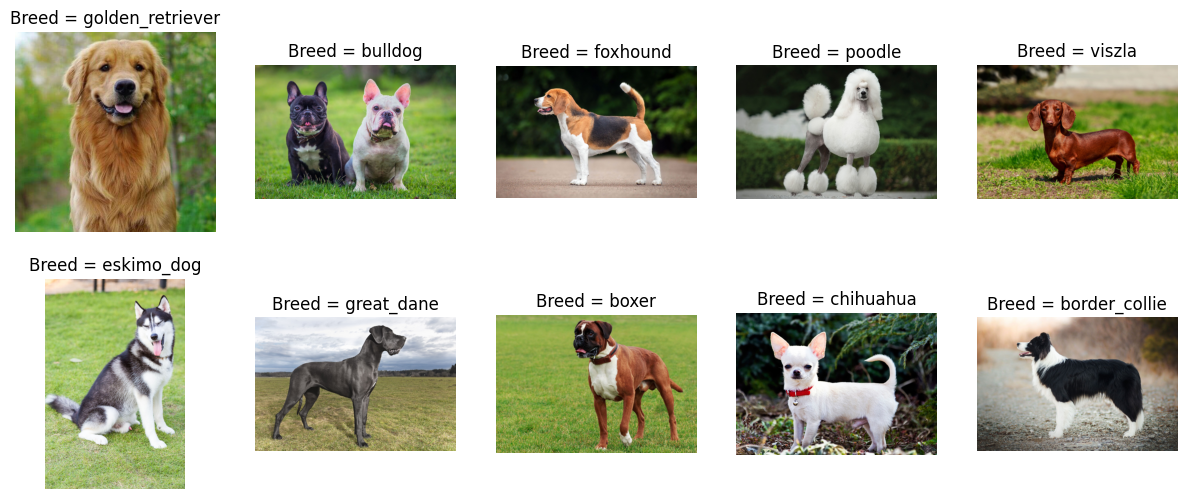

In [15]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def fetch_image_from_url(url):
    '''Fetch an image from the web given its url, and loads it as a PIL image.'''
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for HTTP errors
    image = Image.open(BytesIO(response.content))
    return image

# Example list of dog image URLs
dog_image_urls = {
    "golden_retriever": "https://www.vidavetcare.com/wp-content/uploads/sites/234/2022/04/golden-retriever-dog-breed-info.jpeg",
    "bulldog": "https://cdn.britannica.com/45/233845-050-6B6A7F3E/Two-French-bulldogs.jpg",
    "foxhound": "https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg",
    "poodle": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2023/02/09141023/Diana-the-Poodle.jpg",
    "viszla": "https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcTbX4kyAKSWkOT_amdu2gC9C2RKjaE6ZQrnLOpK1XSNy41NC0cSZw6eVVBW4lPAAJe_YcF2UAvDhp8pQxc",
    "eskimo_dog": "https://encrypted-tbn3.gstatic.com/licensed-image?q=tbn:ANd9GcQVIYgxyZGmuHAmIdkk-ykz1Jkj-w2gADjrvoq4sDpaAQSJZmv00q6OdwC5vghUHxi5TgY7gD0INW29eOI",
    "great_dane": "https://t3.gstatic.com/licensed-image?q=tbn:ANd9GcRcAG6kQ7sRfqAFpa0cTDReX1H2XvoAyl0wXspv8l3eghN4akRvQoPbdtIU9_s7BrLM",
    "boxer": "https://cdn.britannica.com/46/233846-050-8D30A43B/Boxer-dog.jpg",
    "chihuahua": "https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcR3frqA6qXxPHb5gk9vrZQgcHHA78oUVPshn_5s4k1SQ4hUnq7ScWTNp2YOgJYhUuDeLP5hRI_KJXujwiU",
    "border_collie": "https://cdn.britannica.com/25/234625-050-6070814C/Border-Collie-dog.jpg"
}

plt.figure(figsize=(15, 6)) 
for i, (breed, url) in enumerate(dog_image_urls.items()):
    img = fetch_image_from_url(url)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Breed = {breed}")
plt.show()

In [16]:
import torchvision.transforms as transforms

# Define the preprocessing transforms for CNN inputs
transform = transforms.Compose([
    transforms.Resize(256),           # Resize the short side of the image to 256
    transforms.CenterCrop(224),       # Crop a center patch of the image of size 224x224
    transforms.ToTensor(),            # Convert the image to tensor format
    transforms.Normalize(             # Normalize using ImageNet's mean and standard deviation
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Define the model
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet.eval()

# Fetch the image and preprocess it
url = dog_image_urls['golden_retriever']
img = fetch_image_from_url(url)
img_t = transform(img)

# Feed the image to the classifier and compute the most likely prediction
pred = alexnet(img_t[None])
pred_class_index = pred.argmax(axis=1)
print("AlexNet Prediction: ", label_map[pred_class_index])

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/damionhuppert/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:10<00:00, 22.7MB/s] 


AlexNet Prediction:  golden_retriever


Yes it can classify the dogs

##### Question 3-b

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/damionhuppert/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:19<00:00, 28.7MB/s] 
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/damionhuppert/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:04<00:00, 25.2MB/s]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /Users/damionhuppert/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 27.2MB/s]


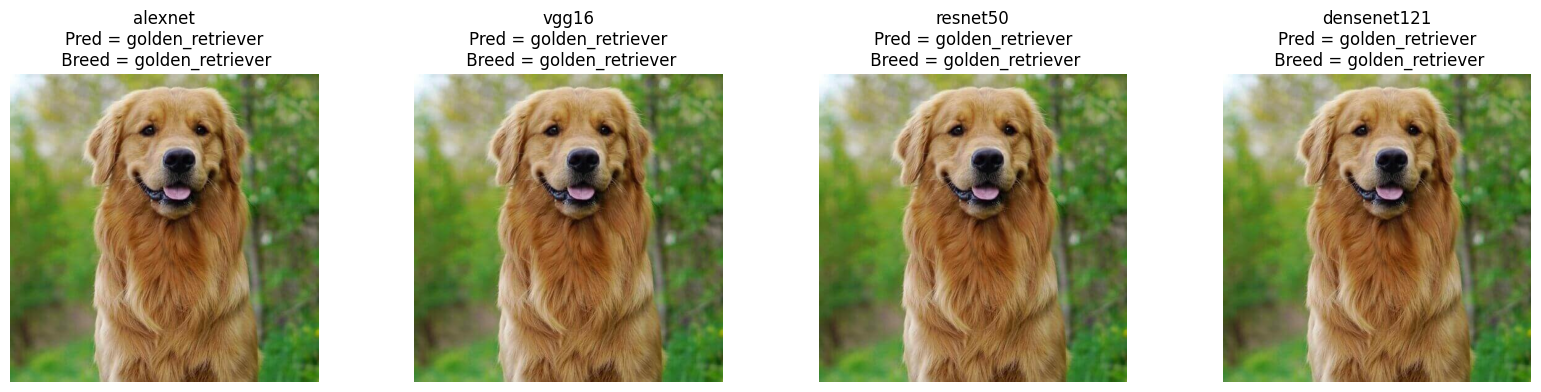

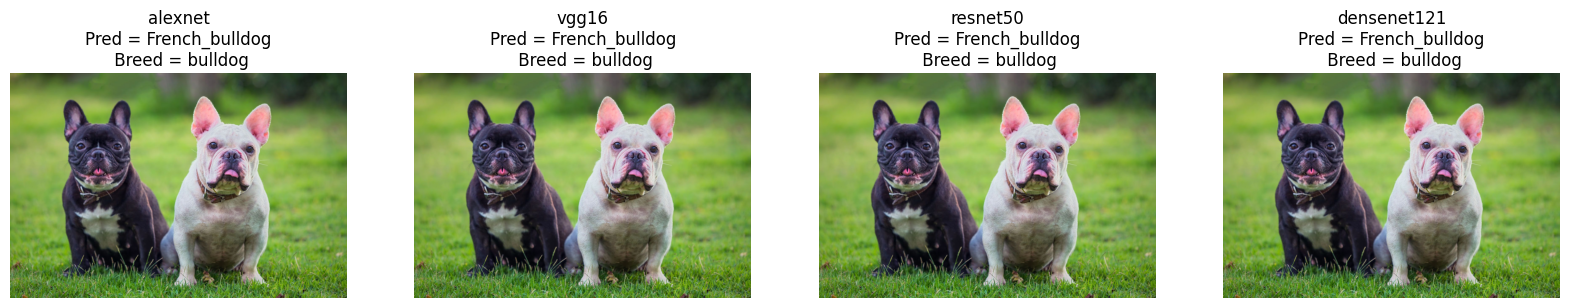

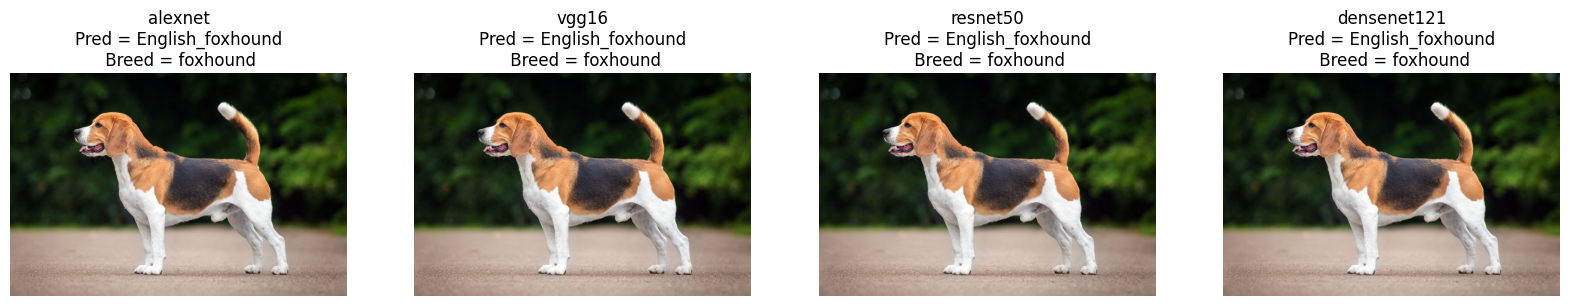

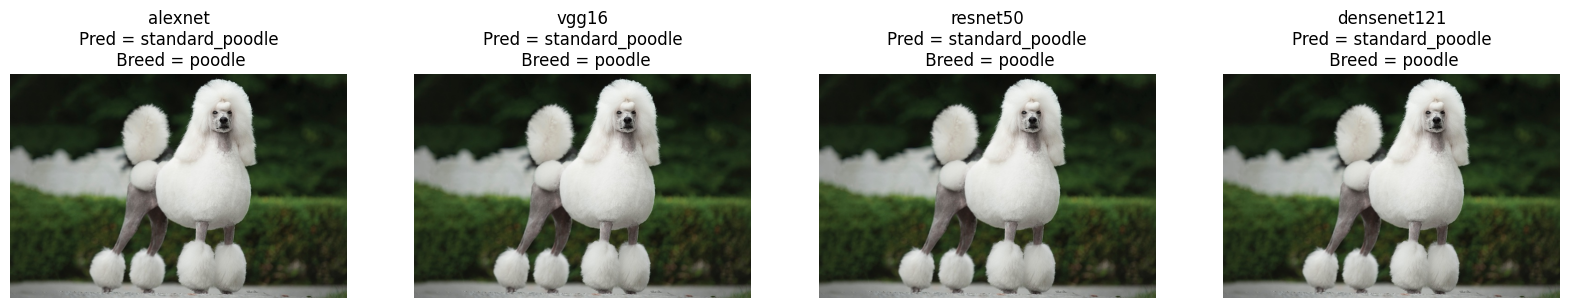

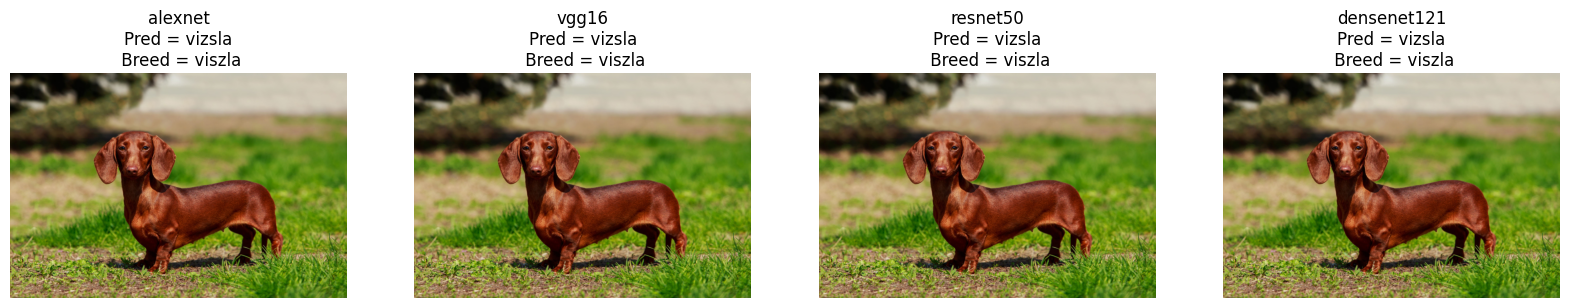

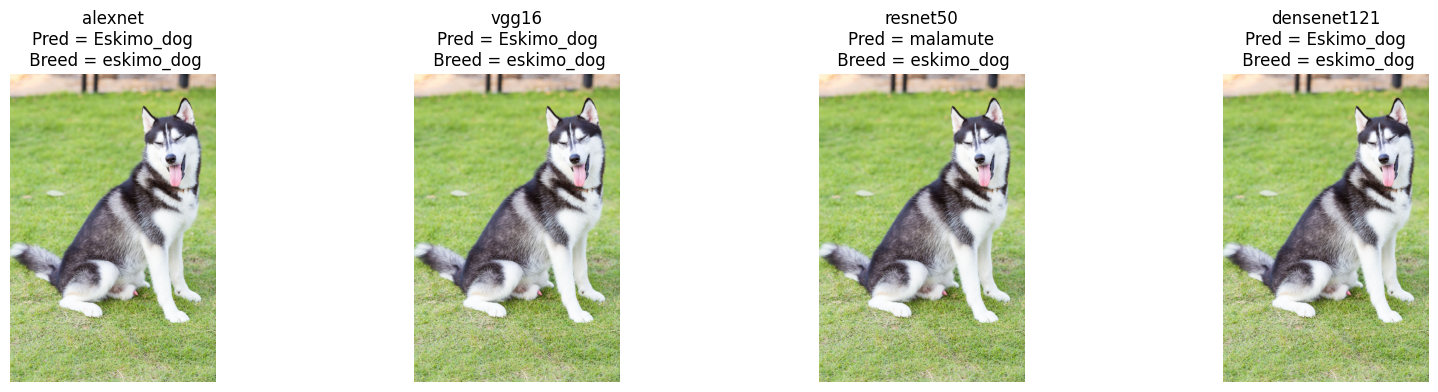

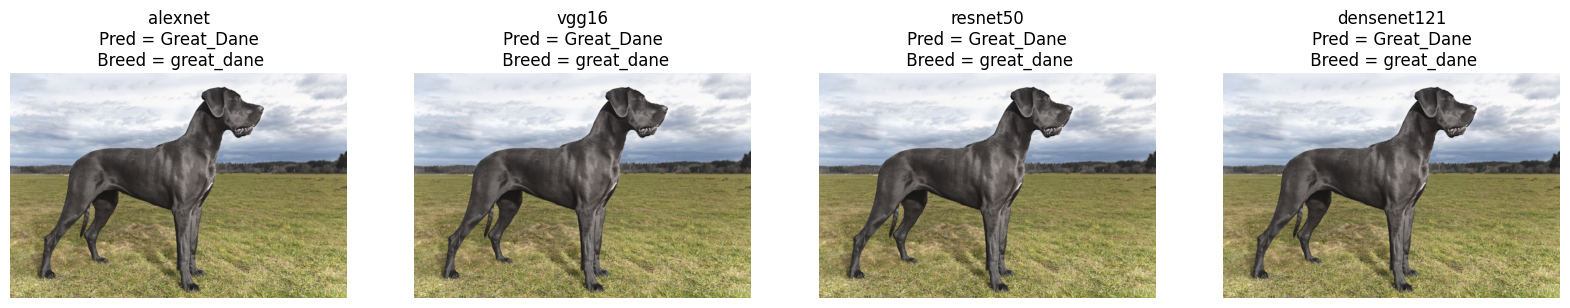

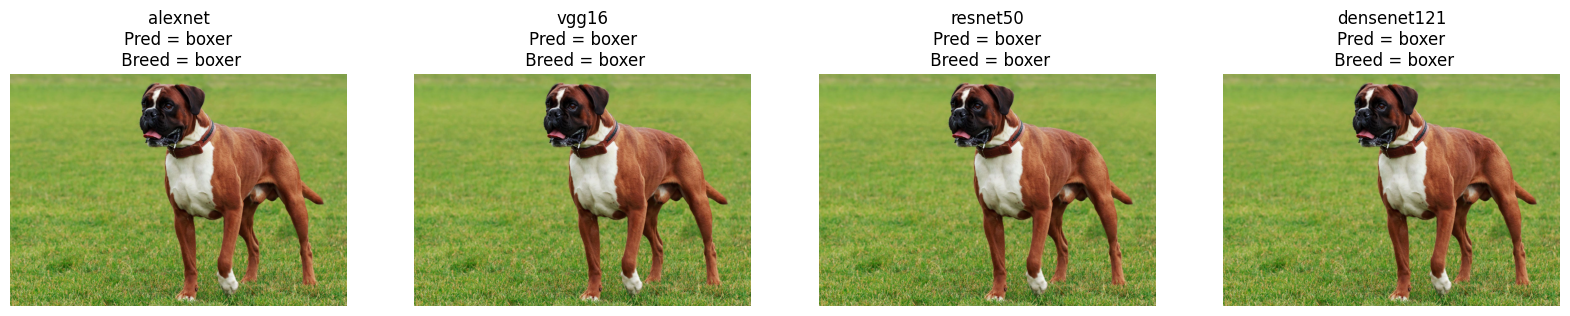

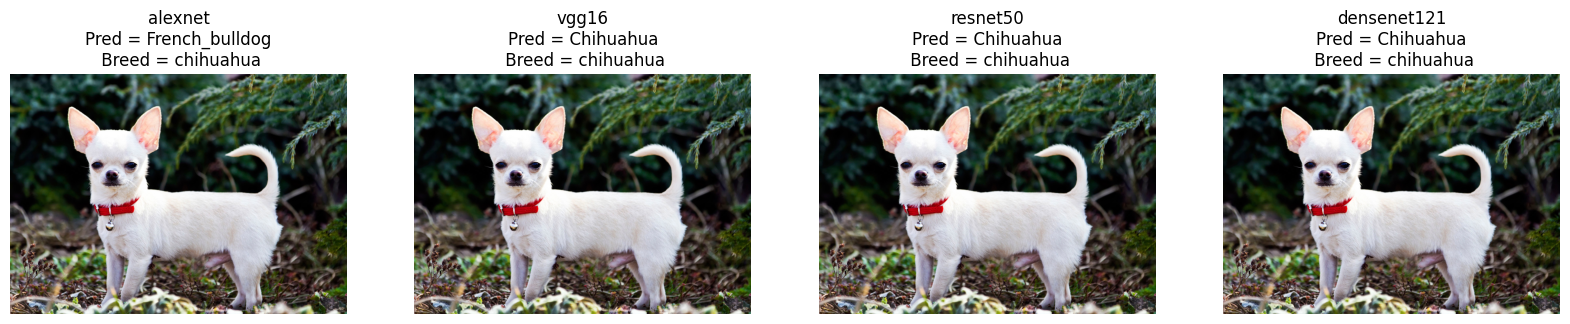

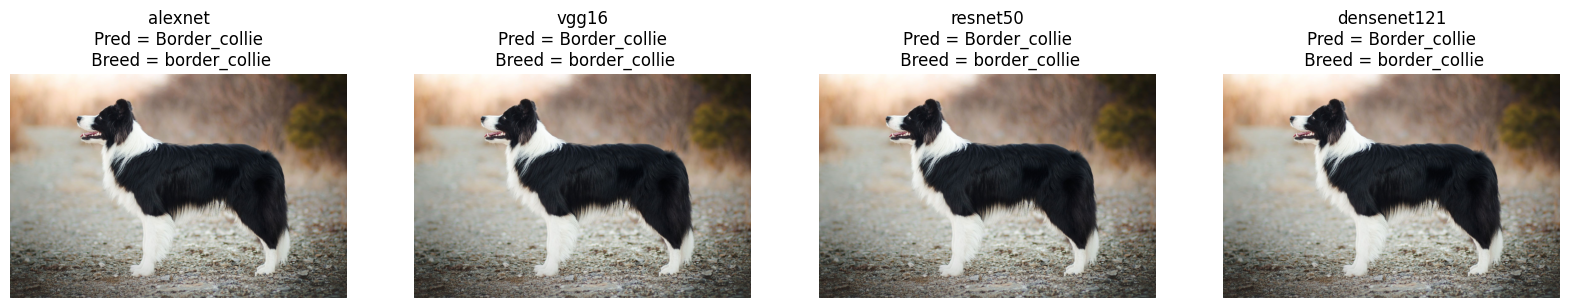

In [17]:
models = {
    'alexnet': torchvision.models.alexnet(pretrained=True).eval(),
    'vgg16': torchvision.models.vgg16(pretrained=True).eval(),
    'resnet50': torchvision.models.resnet50(pretrained=True).eval(),
    'densenet121': torchvision.models.densenet121(pretrained=True).eval(),
}

for i, (breed, url) in enumerate(dog_image_urls.items()):
    img = fetch_image_from_url(url)     # Fetch image
    img_t = transform(img)   # Prepare image for pytorch model

    plt.figure(figsize=(20, 4))     
    for j, arch in enumerate(models.keys()):
        pred = models[arch](img_t[None])                 # Using models[arch], compute the model's prediction
        pred_class_index = pred.argmax(axis=1)     # Find the most likely class index
        pred_class_label = label_map[pred_class_index]

        # Plot the image, labels and predictions
        plt.subplot(1, len(models), 1 + j)
        plt.imshow(img)
        plt.axis(False)
        plt.title(f"{arch}\nPred = {pred_class_label}\n Breed = {breed}")
    plt.show()

They all perform accutately  


In [18]:
correct_predictions = {arch: 0 for arch in models.keys()}  # Store correct predictions per model
total_images = len(dog_image_urls)

for breed, url in dog_image_urls.items():
    img = fetch_image_from_url(url)  # Fetch image
    img_t = transform(img)  # Transform the image

    # Iterate through the models and make predictions
    for arch, model in models.items():
        # Get model prediction
        pred = model(img_t[None])  # Add batch dimension
        pred_class_index = pred.argmax(axis=1)  # Find the most likely class index
        pred_class_label = label_map[pred_class_index.item()]  # Get class label (need .item() to extract value)

        # Check if prediction is correct
        if pred_class_label.lower() == breed.lower():  # Compare lowercased breed names for matching
            correct_predictions[arch] += 1

# Calculate accuracy for each model
accuracies = {arch: correct_predictions[arch] / total_images * 100 for arch in models.keys()}

# Print results
for arch, accuracy in accuracies.items():
    print(f"{arch}: {accuracy:.2f}% accuracy on these 10 images")

# Compare with ImageNet performance
image_net_accuracies = {
    'alexnet': 57.2,
    'vgg16': 71.3,
    'resnet50': 76.0,
    'densenet121': 74.91,
}

print("\nImageNet performance comparison:")
for arch in models.keys():
    print(f"{arch}: {image_net_accuracies[arch]}% ImageNet accuracy")


alexnet: 50.00% accuracy on these 10 images
vgg16: 60.00% accuracy on these 10 images
resnet50: 50.00% accuracy on these 10 images
densenet121: 60.00% accuracy on these 10 images

ImageNet performance comparison:
alexnet: 57.2% ImageNet accuracy
vgg16: 71.3% ImageNet accuracy
resnet50: 76.0% ImageNet accuracy
densenet121: 74.91% ImageNet accuracy
